In [31]:
import sys
import os
caffe_root = 'caffe/'
sys.path.insert(0, caffe_root + 'python/')
import caffe
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
model_def_file = 'prototxt/ResNet-152-deploy.prototxt'
model_weights_file = 'ResNet-152-model.caffemodel'
if not os.path.exists(model_weights_file):
    assert False, 'Download model file first'
caffe.set_mode_gpu()
net = caffe.Net(model_def_file, model_weights_file, caffe.TEST)

In [46]:
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

data	(1, 3, 224, 224)
conv1	(1, 64, 112, 112)
pool1	(1, 64, 56, 56)
pool1_pool1_0_split_0	(1, 64, 56, 56)
pool1_pool1_0_split_1	(1, 64, 56, 56)
res2a_branch1	(1, 256, 56, 56)
res2a_branch2a	(1, 64, 56, 56)
res2a_branch2b	(1, 64, 56, 56)
res2a_branch2c	(1, 256, 56, 56)
res2a	(1, 256, 56, 56)
res2a_res2a_relu_0_split_0	(1, 256, 56, 56)
res2a_res2a_relu_0_split_1	(1, 256, 56, 56)
res2b_branch2a	(1, 64, 56, 56)
res2b_branch2b	(1, 64, 56, 56)
res2b_branch2c	(1, 256, 56, 56)
res2b	(1, 256, 56, 56)
res2b_res2b_relu_0_split_0	(1, 256, 56, 56)
res2b_res2b_relu_0_split_1	(1, 256, 56, 56)
res2c_branch2a	(1, 64, 56, 56)
res2c_branch2b	(1, 64, 56, 56)
res2c_branch2c	(1, 256, 56, 56)
res2c	(1, 256, 56, 56)
res2c_res2c_relu_0_split_0	(1, 256, 56, 56)
res2c_res2c_relu_0_split_1	(1, 256, 56, 56)
res3a_branch1	(1, 512, 28, 28)
res3a_branch2a	(1, 128, 28, 28)
res3a_branch2b	(1, 128, 28, 28)
res3a_branch2c	(1, 512, 28, 28)
res3a	(1, 512, 28, 28)
res3a_res3a_relu_0_split_0	(1, 512, 28, 28)
res3a_res3a_relu

In [47]:
blob = caffe.proto.caffe_pb2.BlobProto()
data = open( 'ResNet_mean.binaryproto' , 'rb' ).read()
blob.ParseFromString(data)
mean = np.array( caffe.io.blobproto_to_array(blob) )[0]
print mean.shape

(3, 224, 224)


In [48]:
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

transformer.set_transpose('data', (2, 0, 1))
transformer.set_mean('data', mean)
transformer.set_raw_scale('data', 255)
transformer.set_channel_swap('data', (2,1,0))

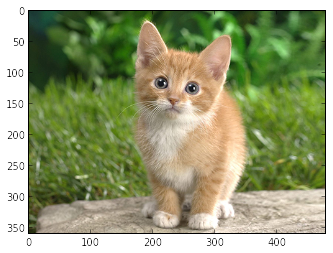

In [49]:
image = caffe.io.load_image(caffe_root + 'examples/images/cat.jpg')
transformed_image = transformer.preprocess('data', image)
plt.imshow(image)

In [50]:
net.blobs['data'].data[...] = transformed_image

output = net.forward()

output_prob = output['prob'][0]

print 'predicted class is:', output_prob.argmax()

predicted class is: 285


In [51]:
labels_file = caffe_root + 'data/ilsvrc12/synset_words.txt'
if not os.path.exists(labels_file):
    !./caffe/data/ilsvrc12/get_ilsvrc_aux.sh

labels = np.loadtxt(labels_file, str, delimiter='\t')
print 'output label:', labels[output_prob.argmax()]

output label: n02124075 Egyptian cat


In [52]:
%timeit net.forward()

10 loops, best of 3: 100 ms per loop
